In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [16]:
iris = load_iris(as_frame=True)
new_col_name_map = {
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
    "target": "species_id",
}
df = iris.frame.rename(columns=new_col_name_map)
df["species"] = df["species_id"].map({i: n for i, n in enumerate(iris.target_names)})

df = df.drop(columns=["species_id"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
display(df.shape)
display(df.head(3))
display(df.tail(3))
display(df.info())

(150, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [18]:
missing = df.isna().sum()
display(missing)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
species_count = df["species"].value_counts()
display(species_count)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
feature_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
desc = df[feature_cols].describe()
desc

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
mean_median_abs = (
    (df[feature_cols].mean() - df[feature_cols].median())
    .abs()
    .sort_values(ascending=False)
)
display(mean_median_abs)

diff_std = df[feature_cols].std().sort_values(ascending=False)
display(diff_std)

petal_length    0.592000
petal_width     0.100667
sepal_width     0.057333
sepal_length    0.043333
dtype: float64

petal_length    1.765298
sepal_length    0.828066
petal_width     0.762238
sepal_width     0.435866
dtype: float64

In [35]:
feature_table = {
    "var": df[feature_cols].var(),
    "std": df[feature_cols].std(),
    "range": df[feature_cols].max() - df[feature_cols].min(),
}
feature_table = pd.DataFrame(feature_table)
display(feature_table)

,var,std,range
sepal_length,0.685694,0.828066,3.6
sepal_width,0.189979,0.435866,2.4
petal_length,3.116278,1.765298,5.9
petal_width,0.581006,0.762238,2.4


In [ ]:
quantiles = [0.25, 0.5, 0.75]
col_quantiles = (
    df[feature_cols]
    .quantile(quantiles)
    .rename(index={0.25: "Q1", 0.5: "median", 0.75: "Q3"})
    .T
)
col_quantiles["IQR"] = col_quantiles["Q3"] - col_quantiles["Q1"]
col_quantiles

,Q1,median,Q3,IQR
sepal_length,5.1,5.80,6.4,1.3
sepal_width,2.8,3.00,3.3,0.5
petal_length,1.6,4.35,5.1,3.5
petal_width,0.3,1.30,1.8,1.5


In [58]:
skew_kurtosis = {
    "skewnewss": df[feature_cols].skew(),
    "kurtosis": df[feature_cols].kurt(),
}
display(pd.DataFrame(skew_kurtosis))

,skewnewss,kurtosis
sepal_length,0.314911,-0.552064
sepal_width,0.318966,0.228249
petal_length,-0.274884,-1.402103
petal_width,-0.102967,-1.340604


In [63]:
display(df.groupby("species")[feature_cols].mean())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [66]:
df.groupby("species")[feature_cols].agg(["median", "std"])

sepal_length           sepal_width           petal_length  \
                 median       std      median       std       median   
species                                                                
setosa              5.0  0.352490         3.4  0.379064         1.50   
versicolor          5.9  0.516171         2.8  0.313798         4.35   
virginica           6.5  0.635880         3.0  0.322497         5.55   

                     petal_width            
                 std      median       std  
species                                     
setosa      0.173664         0.2  0.105386  
versicolor  0.469911         1.3  0.197753  
virginica   0.551895         2.0  0.274650

In [68]:
df.groupby("species")["petal_length"].agg(["min", "max"])

,min,max
species,,
setosa,1.0,1.9
versicolor,3.0,5.1
virginica,4.5,6.9


In [69]:
def get_iqr(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return iqr

In [70]:
df.groupby("species").apply(lambda s: get_iqr(s))

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


In [81]:
top5_setosa = (
    df[df["species"] == "setosa"].sort_values("sepal_length", ascending=False).head(5)
)
display(top5_setosa)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
36,5.5,3.5,1.3,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa


In [94]:
big_patal = df[(df["petal_length"] >= 5.0) & (df["petal_width"] >= 1.8)]
display(len(big_patal))
display(big_patal["species"].value_counts())

40

species
virginica    40
Name: count, dtype: int64

In [104]:
q90 = df["sepal_width"].quantile(0.9)
versi_top10 = df[(df["species"] == "versicolor") & df["sepal_width"] >= q90]
versi_top10

,sepal_length,sepal_width,petal_length,petal_width,species


In [112]:
df.groupby("species").mean().sort_values("petal_length", ascending=False)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
virginica,6.588,2.974,5.552,2.026
versicolor,5.936,2.770,4.260,1.326
setosa,5.006,3.428,1.462,0.246


In [ ]:
corr = df[feature_cols].corr()
corr_long = (
    corr.where(~np.eye(len(corr), dtype=bool))
    .stack()
    .rename("corr")
    .reset_index()
    .rename(columns={"level_0": "var1", "level_1": "var2"})
)

corr_long["pair"] = corr_long.apply(
    lambda r: tuple(sorted([r["var1"], r["var2"]])), axis=1
)

corr_long = (
    corr_long.assign(abs_corr=corr_long["corr"].abs())
    .drop_duplicates("pair")
    .sort_values("abs_corr", ascending=False)
    .drop(columns=["pair"])
    .head(2)
)

display(corr_long)

,var1,var2,corr,abs_corr
8,petal_length,petal_width,0.962865,0.962865
1,sepal_length,petal_length,0.871754,0.871754


In [150]:
orverall_corr = df[feature_cols].corr()
display(orverall_corr)
sp_df = {sp: g[feature_cols].corr() for sp, g in df.groupby("species")}
for sp, g in sp_df.items():
    display(sp)
    display(g)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


np.str_('setosa')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


np.str_('versicolor')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


np.str_('virginica')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [151]:
df[feature_cols].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


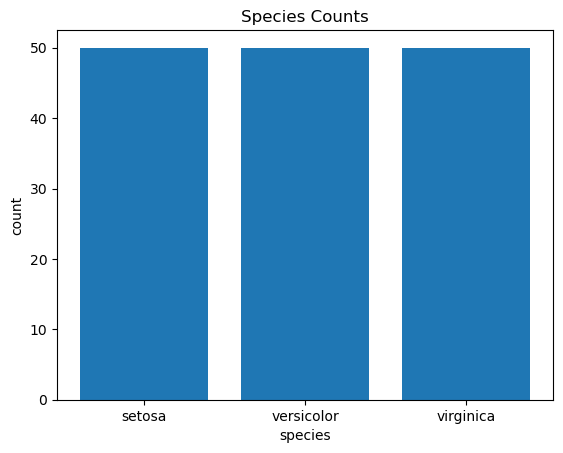

In [153]:
counts = df["species"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Species Counts")
plt.xlabel("species")
plt.ylabel("count")
plt.show()

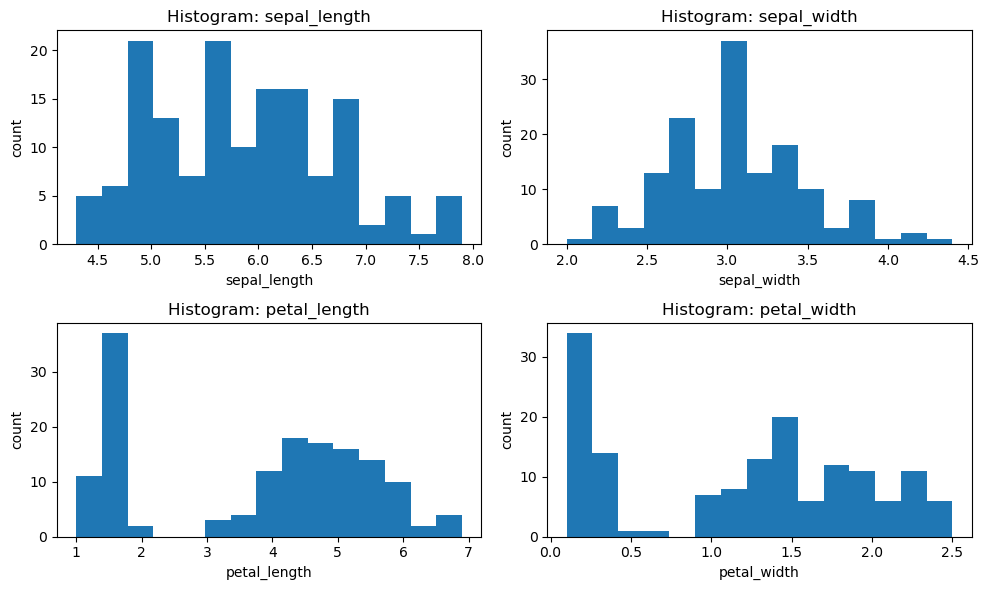

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

for ax, col in zip(axes, feature_cols):
    ax.hist(df[col], bins=15)
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("count")

plt.tight_layout()
plt.show()

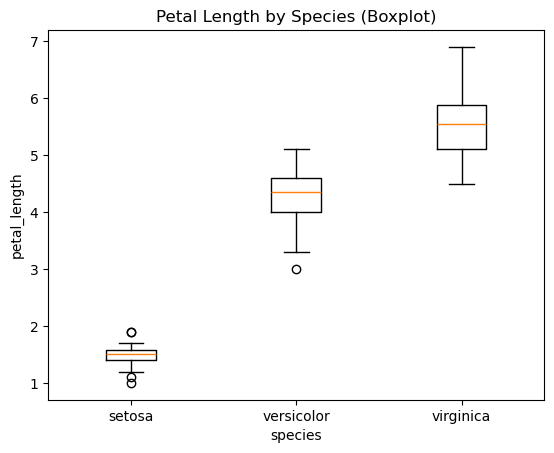

In [160]:
species_order = sorted(df["species"].unique())
data = [df.loc[df["species"] == sp, "petal_length"] for sp in species_order]

plt.figure()
plt.boxplot(data, tick_labels=species_order, showfliers=True)
plt.title("Petal Length by Species (Boxplot)")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.show()

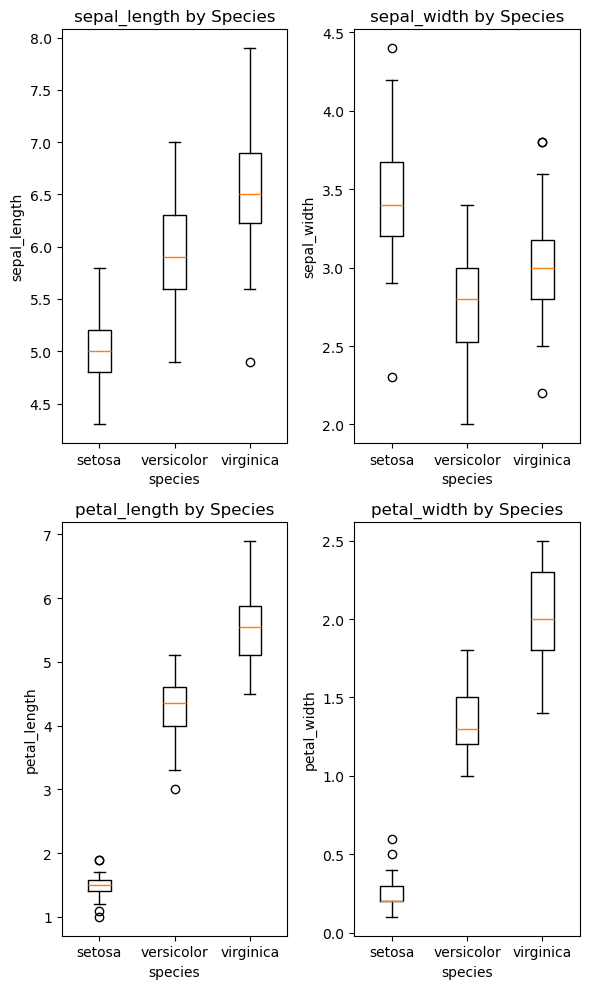

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 10))
axes = axes.ravel()

for ax, col in zip(axes, feature_cols):
    data = [df.loc[df["species"] == sp, col] for sp in species_order]
    ax.boxplot(data, tick_labels=species_order, showfliers=True)
    ax.set_title(f"{col} by Species")
    ax.set_xlabel("species")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [172]:
species_codes = df["species"].astype("category").cat.codes  # 0,1,2
species_names = df["species"].astype("category").cat.categories
display(species_codes)
display(species_names)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

Index(['setosa', 'versicolor', 'virginica'], dtype='object')